In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aapl = pd.read_csv('aapl stock.csv')
googl = pd.read_csv('googl stock.csv')
nke = pd.read_csv('nke stock.csv')
amzn = pd.read_csv('amzn stock.csv')
vz = pd.read_csv('vz stock.csv')

In [3]:
aapl['ds'] = pd.DatetimeIndex(aapl['Date'])
amzn['ds'] = pd.DatetimeIndex(amzn['Date'])
googl['ds'] = pd.DatetimeIndex(googl['Date'])
nke['ds'] = pd.DatetimeIndex(nke['Date'])
vz['ds'] = pd.DatetimeIndex(vz['Date'])

In [4]:
aapl = aapl.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
amzn = amzn.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
googl = googl.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
nke = nke.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
vz = vz.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])

In [5]:
aapl['Month'] = pd.DatetimeIndex(aapl['ds']).month
aapl['Year'] = pd.DatetimeIndex(aapl['ds']).year
aapl['Week'] = pd.DatetimeIndex(aapl['ds']).week

amzn['Month'] = pd.DatetimeIndex(amzn['ds']).month
amzn['Year'] = pd.DatetimeIndex(amzn['ds']).year
amzn['Week'] = pd.DatetimeIndex(amzn['ds']).week

googl['Month'] = pd.DatetimeIndex(googl['ds']).month
googl['Year'] = pd.DatetimeIndex(googl['ds']).year
googl['Week'] = pd.DatetimeIndex(googl['ds']).week

nke['Month'] = pd.DatetimeIndex(nke['ds']).month
nke['Year'] = pd.DatetimeIndex(nke['ds']).year
nke['Week'] = pd.DatetimeIndex(nke['ds']).week

vz['Month'] = pd.DatetimeIndex(vz['ds']).month
vz['Year'] = pd.DatetimeIndex(vz['ds']).year
vz['Week'] = pd.DatetimeIndex(vz['ds']).week

/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_18229/3698600147.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  aapl['Week'] = pd.DatetimeIndex(aapl['ds']).week
/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_18229/3698600147.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  amzn['Week'] = pd.DatetimeIndex(amzn['ds']).week
/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_18229/3698600147.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns

In [6]:
aapl.dtypes

Open            float64
Close           float64
ds       datetime64[ns]
Month             int64
Year              int64
Week              int64
dtype: object

# <h1><center>FBProphet Models</center></h1>


## AAPL FBProphet

In [7]:
from fbprophet import Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -42.5404
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6976.75    0.00125613       522.184      0.3692           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7151.75     0.0416344        355.37      0.9338      0.9338      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7238.36     0.0480981       2462.42           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       7290.47   7.68162e-05       180.898   3.368e-07       0.001      489  LS failed, Hessian reset 
     399       7302.03     0.0230812       1200.26           1           1      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7315.72    0.00330697    

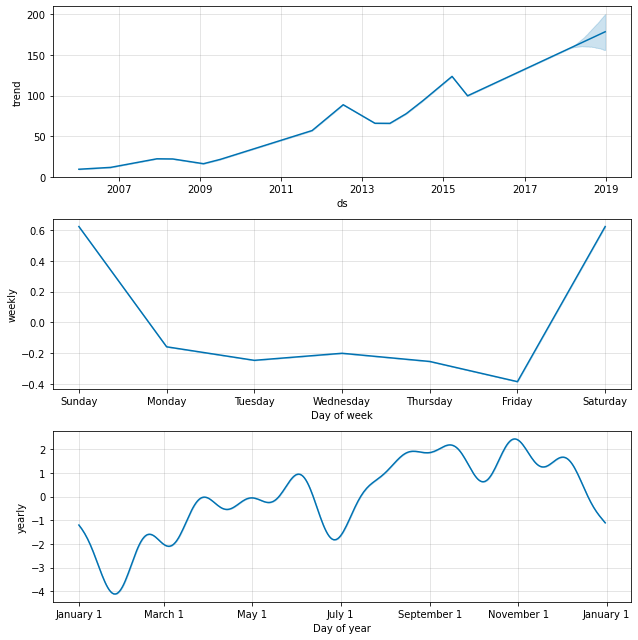

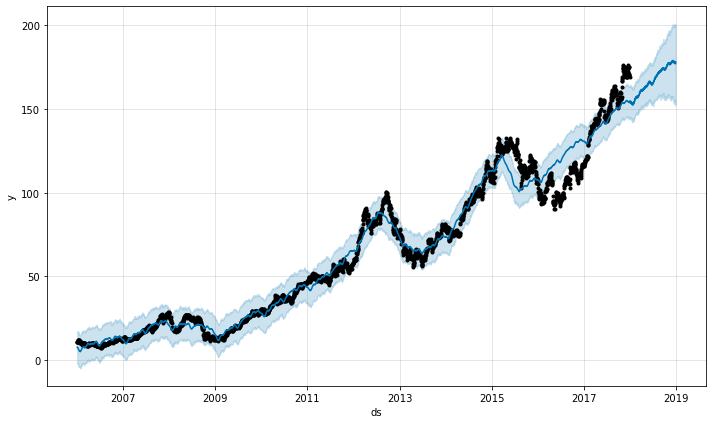

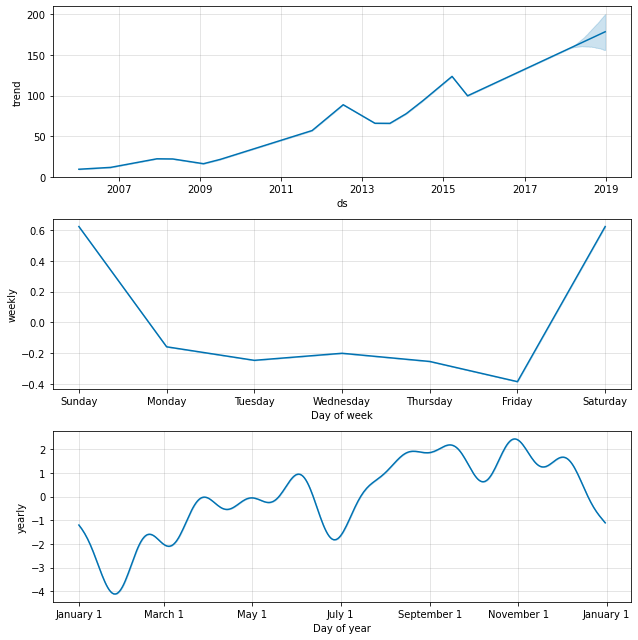

In [8]:
model = Prophet()
aapl = aapl.drop(columns=['Open', 'Month', 'Year', 'Week'])
aapl = aapl.rename(columns={'Close': 'y'})

model.fit(aapl)

future = model.make_future_dataframe(periods=365)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

In [9]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [10]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Initial log joint probability = -17.8404
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6006.62     0.0279198       627.823           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6239.59     0.0174601       3171.11     0.04595       0.812      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6308.41      0.006564       755.519      0.3838      0.3838      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6335.4    0.00664491        197.95           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6367.71    0.00202082       511.581       0.586       0.586      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-05,131.343280,124.632078,137.748694,102.71,2016-01-04
1,2016-01-06,131.630878,124.416209,138.395469,100.70,2016-01-04
2,2016-01-07,131.816690,124.894943,138.119220,96.45,2016-01-04
3,2016-01-08,131.972135,125.253965,138.844442,96.96,2016-01-04
4,2016-01-11,132.500081,125.433318,139.212697,98.53,2016-01-04


In [11]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,619.653256,24.892835,22.876450,0.223506,0.193245,0.013333
1,38 days,630.471175,25.109185,23.008897,0.225400,0.193245,0.026667
2,39 days,628.635294,25.072600,22.879842,0.223256,0.183189,0.026667
3,40 days,618.658597,24.872849,22.643287,0.219642,0.179822,0.026667
4,41 days,623.829984,24.976589,22.735747,0.219654,0.179822,0.040000


/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


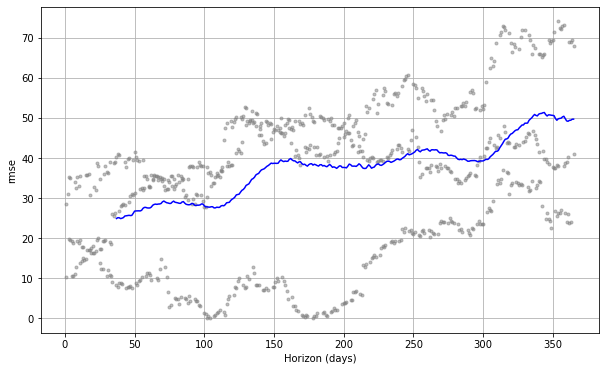

In [12]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## AMZN Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -125.937
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9487.11    0.00424851       1202.83           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9690.12     0.0047078       3375.11           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9781.19    0.00196623       970.005           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9837.22    0.00636208       1961.08      0.5571      0.5571      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9855.22    0.00263266       468.617      0.5819      0.5819      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

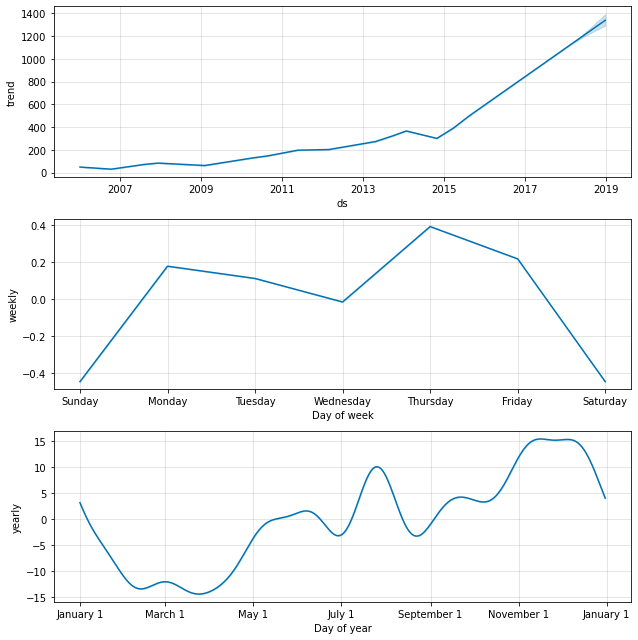

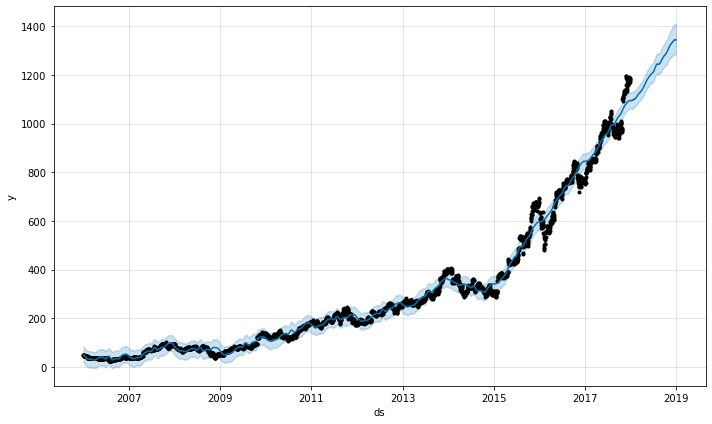

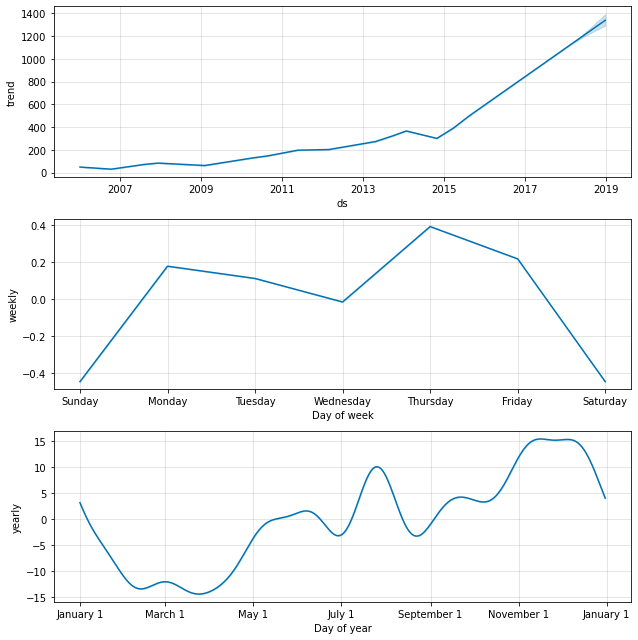

In [13]:
model = Prophet()
amzn = amzn.drop(columns=['Open', 'Month', 'Year', 'Week'])
amzn = amzn.rename(columns={'Close': 'y'})

model.fit(amzn)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Initial log joint probability = -71.828
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6168.68     0.0649185       913.074       1.173      0.1173      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6189.71    0.00357963        552.22       0.291       0.291      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6198.03   0.000658866       101.253      0.6664      0.6664      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       6198.96   0.000150699       178.561   1.202e-06       0.001      472  LS failed, Hessian reset 
     399       6199.31   5.16258e-05       63.6778      0.7758      0.7758      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     473       6200.37   8.08879e-05     

/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


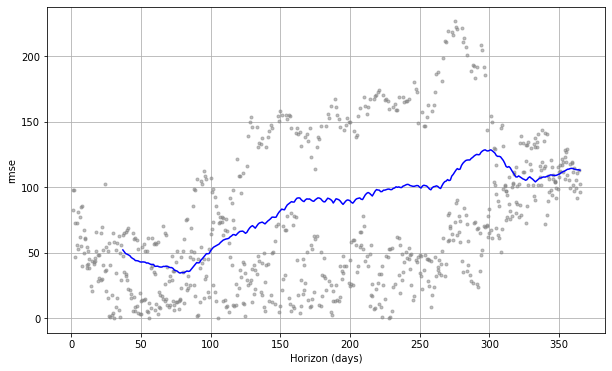

In [14]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

df_p = performance_metrics(df_cv)
df_p.head()

fig = plot_cross_validation_metric(df_cv, metric='rmse')

## GOOGL Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -71.9491
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8824.29    0.00590956       1056.04           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9123.07     0.0189266       1712.77           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9234.38     0.0117298       2959.79           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9261.49    0.00215708       1142.43           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9292.35    0.00374034       346.282           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

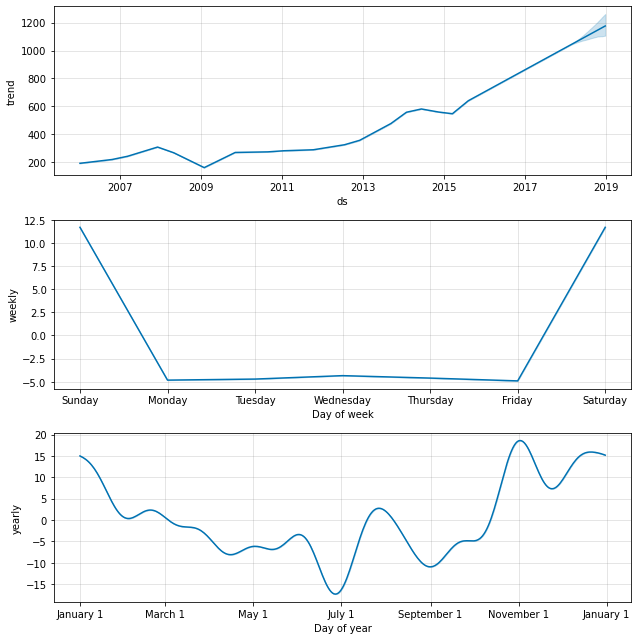

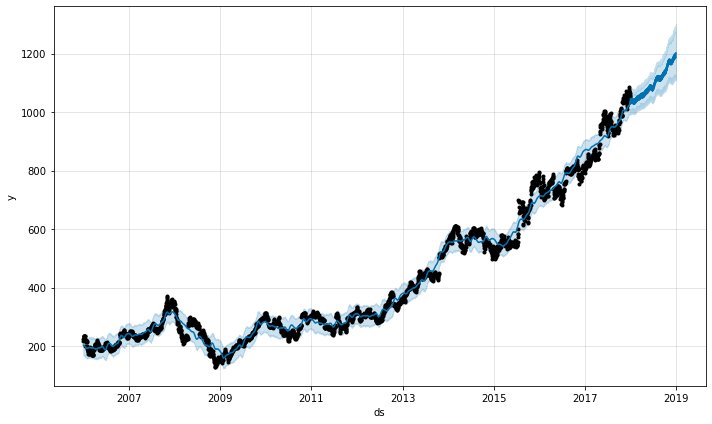

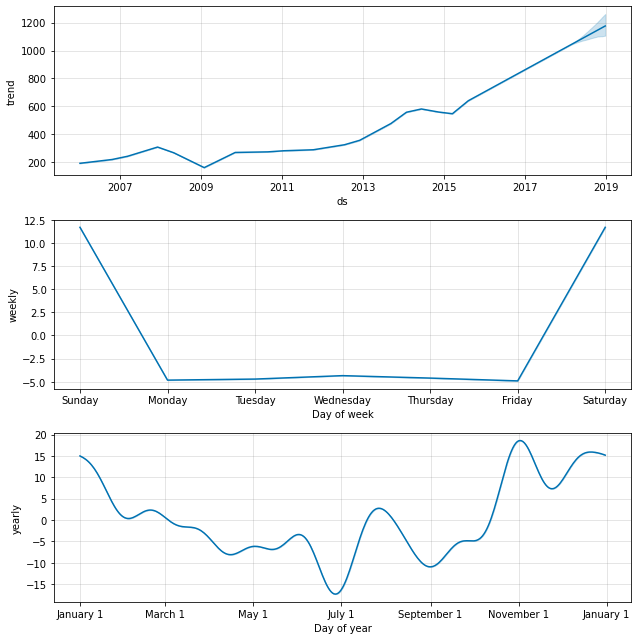

In [15]:
model = Prophet()
googl = googl.drop(columns=['Open', 'Month', 'Year', 'Week'])
googl = googl.rename(columns={'Close': 'y'})

model.fit(googl)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Initial log joint probability = -57.2343
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6525.06     0.0102299       807.892      0.3301      0.3301      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6640.87     0.0196397       920.961           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6670.01    0.00811306       342.712       6.533      0.6533      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       6675.31   4.27992e-05        108.16   5.484e-07       0.001      449  LS failed, Hessian reset 
     399       6677.21     0.0045309       580.428           1           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6694.36    0.00220088    

/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


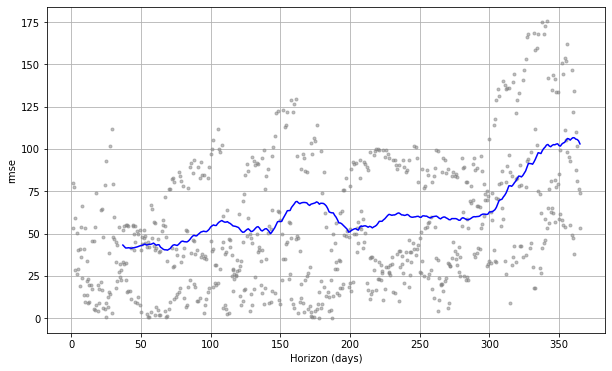

In [16]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

df_p = performance_metrics(df_cv)
df_p.head()

fig = plot_cross_validation_metric(df_cv, metric='rmse')

## NKE Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -29.3314
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8236.48     0.0186088       2777.58           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8520.55    0.00313033       1375.31           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8705.31    0.00729869       4265.09     0.08028           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8777.85     0.0103248       949.977           1           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8807.47     0.0233306       978.345      0.6033      0.6033      558   
    Iter      log prob        ||dx||      ||grad||       alpha  

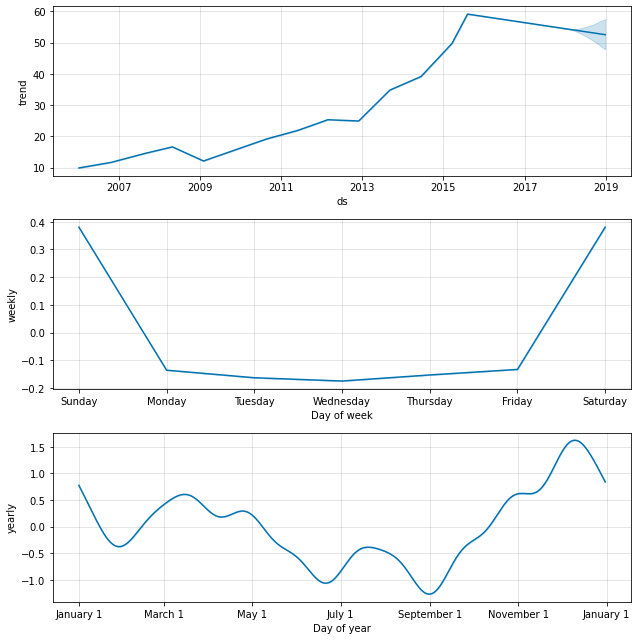

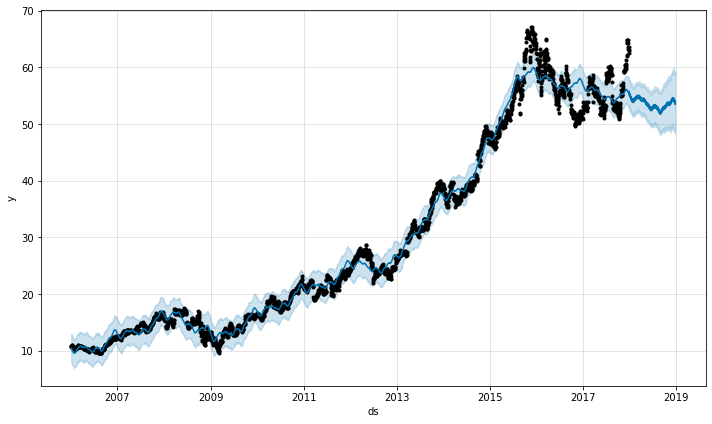

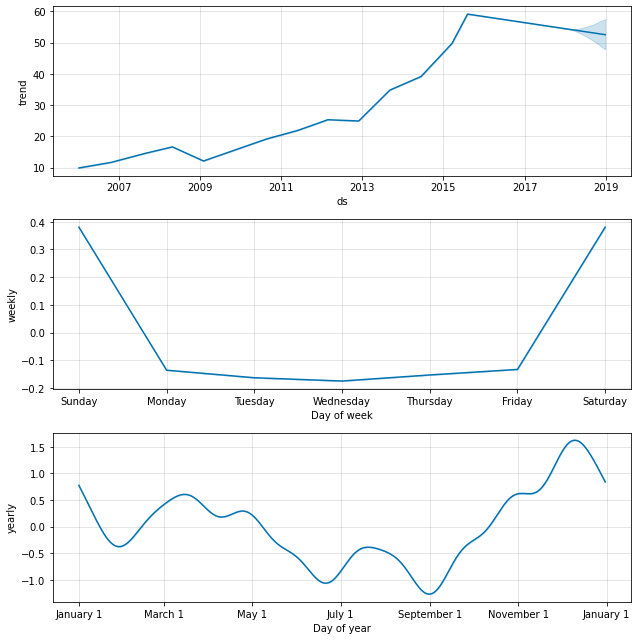

In [17]:
model = Prophet()
nke = nke.drop(columns=['Open', 'Month', 'Year', 'Week'])
nke = nke.rename(columns={'Close': 'y'})

model.fit(nke)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Initial log joint probability = -49.1901
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7762.14     0.0110012       1582.21           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7929.18      0.014427       1650.23       0.889       0.889      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8024.43     0.0399121        725.85           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8076.35     0.0147764       1946.05           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8088.96    0.00116022       1065.86      0.2798           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -19.8415
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7164.66     0.0185118       555.016           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        7228.6    0.00868328        345.18      0.8377      0.8377      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7247.45    0.00580374       305.703      0.7883      0.7883      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7263.73   0.000927917       129.041           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458       7266.29   9.18252e-05       194.774   5.306e-07       0.001      592  LS failed, Hessian reset 
     499       7267.35    0.00548261    

/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


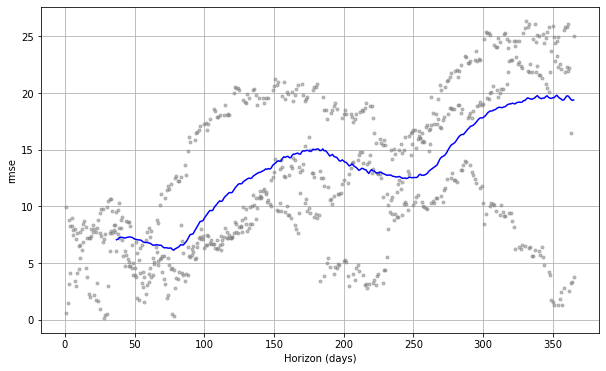

In [18]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

df_p = performance_metrics(df_cv)
df_p.head()
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## VZ Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.0062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8061.59     0.0225397       1908.62      0.3728           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8157.56    0.00496086       1507.77       0.537       0.537      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8208.44      0.021258        3774.3           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        8232.1   0.000692149       310.047      0.6251      0.6251      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        8238.1    0.00393607       201.948           1           1      555   
    Iter      log prob        ||dx||      ||grad||       alpha  

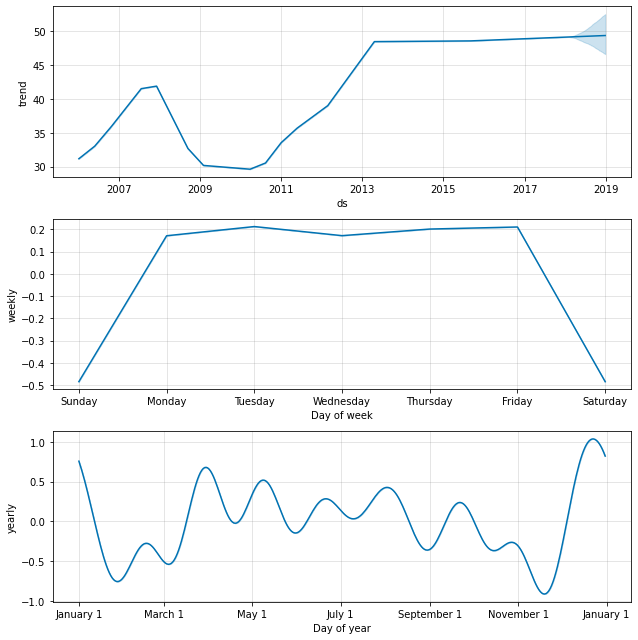

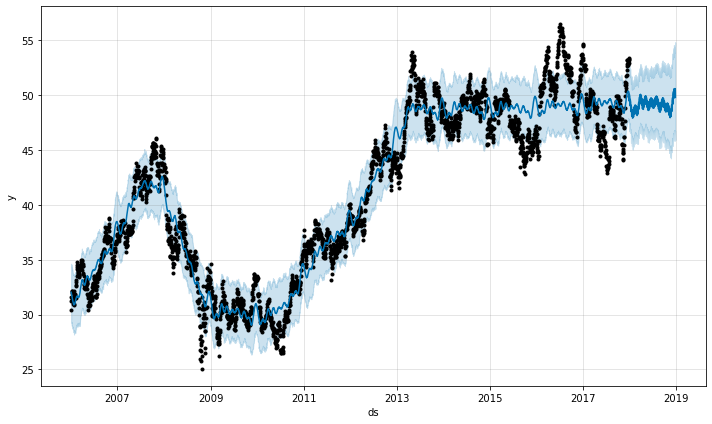

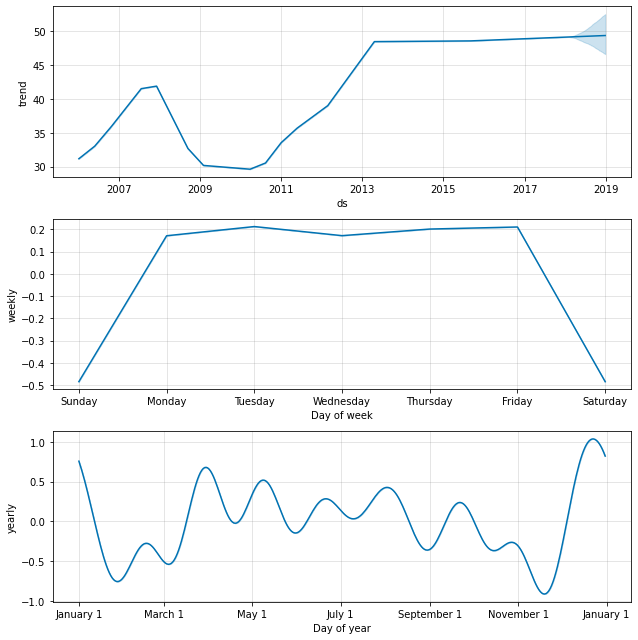

In [19]:
model = Prophet()
vz = vz.drop(columns=['Open', 'Month', 'Year', 'Week'])
vz = vz.rename(columns={'Close': 'y'})

model.fit(vz)

pred = model.predict(future)

model.plot(pred)
model.plot_components(pred)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-04 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Initial log joint probability = -14.5521
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6995.47     0.0103025       589.885           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7147.51     0.0420478       2713.92       1.769      0.1769      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7278.29     0.0245092       2110.34           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7327.94     0.0182575       2111.59           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7345.45     0.0177402       851.575           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

Initial log joint probability = -14.6216
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7432.76     0.0568025       5082.45           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7627.32    0.00826411       586.831           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7715.19      0.023555       1022.71           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7753.67    0.00195578       268.433         1.6        0.16      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7787.75     0.0480442       560.178         3.1        0.31      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


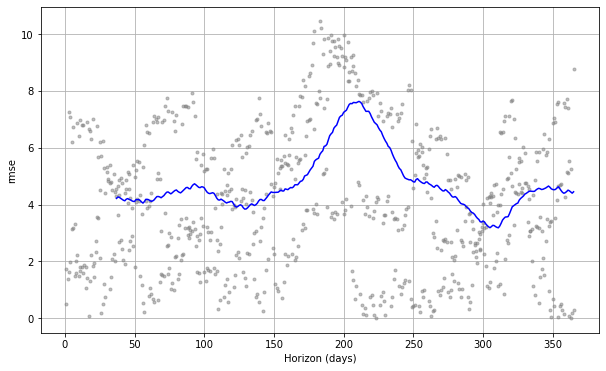

In [20]:
df_cv = cross_validation(model, initial = '3650 days', period = '180 days', horizon = '365 days')
df_cv.head()

df_p = performance_metrics(df_cv)
df_p.head()

fig = plot_cross_validation_metric(df_cv, metric='rmse')